In [2]:
from mcmr_crosstalk import MCMR_Crosstalk_Experiment
from selene_sim import DepolarizingErrorModel, Stim, Quest

In [5]:
probe_qubits = [q for q in range(6)]#range(56)]
focus_qubits = [0,1]
for focus_qubit in focus_qubits:
    probe_qubits.remove(focus_qubit)

seq_lengths = [10, 500, 1000] #, 200, 400, 600]
seq_reps = 1
reset = True
measure = True
# filename = f'exp_MCMR_Crosstalk.p' #_Reset_{reset}_Measure_{measure}_q{focus_qubits}.p'
filename = f'exp_Reset_{reset}_Measure_{measure}_q{focus_qubits}.p'

exp = MCMR_Crosstalk_Experiment(focus_qubits, probe_qubits, seq_lengths, seq_reps, filename=filename, measure = measure, reset = reset)
exp.add_settings()

### Run local simulation using Selene

In [6]:
# Setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-4,
    # two qubit gate error rate
    #p_2q=1e-3,
    p_meas=1e-3,
    p_init=1e-3,
)

# VEC:  Revisit when crosstalk is added to Selene

In [7]:
# simulate experiment

shots = 1000
simulator = Quest()

exp.sim(shots, error_model = error_model, simulator=simulator)


Simulating ...
1/3 circuits complete
2/3 circuits complete
3/3 circuits complete


6


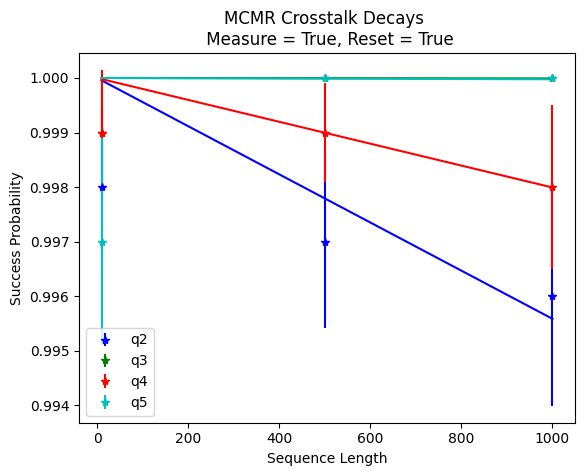

Average Infidelities 
------------------------------
qubit 2: 0.99999797 +/- 2.08e-06
qubit 3: 0.99999999 +/- 3e-08
qubit 4: 0.99999898 +/- 1.28e-06
qubit 5: 1.0 +/- 2e-08
------------------------------
Qubit Average: 0.99999923 +/- 6.1e-07


In [8]:
exp.analyze_results()

In [9]:
exp.fid_avg_std

[np.float64(2.0782163073467662e-06),
 np.float64(3.162031771606207e-08),
 np.float64(1.2804408296324463e-06),
 np.float64(1.8294860926120683e-08)]

In [10]:
# save experiment object to working directory

exp.save()